# Gradient Descent

In [ ]:
# Pertama kita definisikan library NumPy dan Matplotlib.
# Library torch biasa digunakan untuk membangun model Machine Learning, khususnya Deep Learning.
# Torch juga bisa digunakan untuk mempraktekan tugas yang biasa dihandle oleh NumPy. 

import torch
import matplotlib.pyplot as plt

In [ ]:
# Definisikan data ke dalam variabel "xs" dan "ys"

xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [ ]:
# Definisikan sebuah persamaan regresi pada fungsi sebagai berikut:

def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [ ]:
# Kita definisikan slope pada variabel "m" dan "b"

m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1**: Forward pass

In [ ]:
# Pertama lakukan "Forward Pass" sehingga menghasilkan "yhats"

yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

Hitung cost $C$ dengan mengoperasikan $\hat{y}$ dan true $y$ menggunakan metode "mean squared error", yang mana metode bekerja dengan mengambil rata-rata quadratic cost di beberapa titik data, seperti pada persamaan berikut: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [ ]:
# Tulis metode "mean squared error" pada Python

def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [ ]:
# Hitung nilai cost

C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

**Step 3**: Gunakan autodiff untuk menghitung gradient dari C dengan menggunakan parameters "m" dan "b"

In [ ]:
C.backward()
m.grad
b.grad

tensor([6.2650])

**Step 4**: Gradient descent

In [ ]:
# Jalankan Gradient Descent dengan menjalankan perintah berikut

optimizer = torch.optim.SGD([m, b], lr=0.01)
optimizer.step()

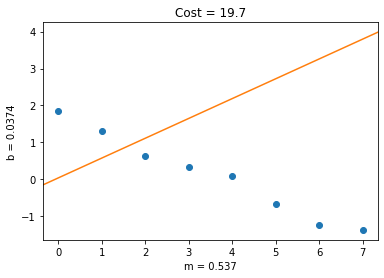

In [ ]:
# Visualisasi hasil pemrosesan Gradient Descent

def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

labeled_regression_plot(xs, ys, m, b, C, include_grad=False)